In [0]:
from fastai import *
from fastai.text import *

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d jrobischon/wikipedia-movie-plots

 57% 17.0M/29.9M [00:00<00:00, 26.5MB/s]
100% 29.9M/29.9M [00:00<00:00, 47.1MB/s]


In [4]:
!unzip wikipedia-movie-plots -d Dataset

Archive:  wikipedia-movie-plots.zip
  inflating: Dataset/wiki_movie_plots_deduped.csv  


In [0]:
df=pd.read_csv('/content/Dataset/wiki_movie_plots_deduped.csv')

In [15]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [0]:
df=df[['Plot']]

In [17]:
df.head()

,Plot
0,"A bartender is working at a saloon, serving dr..."
1,"The moon, painted with a smiling face hangs ov..."
2,"The film, just over a minute long, is composed..."
3,Lasting just 61 seconds and consisting of two ...
4,The earliest known adaptation of the classic f...


In [18]:
data=(TextList.from_df(df,cols='Plot',path='Dataset').
      split_by_rand_pct(0.2)
      .label_for_lm()
      .databunch(bs=128))


In [19]:
data.show_batch()

idx,text
0,"smashing the xxunk , mirrors , and breaking the cash register . xxmaj the bartender then sprays seltzer water in xxmaj nation 's face before a group of policemen appear and order everybody to xxunk ] xxbos xxmaj the moon , painted with a smiling face hangs over a park at night . a young couple walking past a fence learn on a railing and look up . xxmaj the"
1,"xxmaj harry , in which he announces he will travel to them for a vacation , they see an opportunity to get a break from the kids . xxmaj knowing that xxmaj harry is an expert on children , they assume that he will appreciate the gesture and leave just after he arrives . xxmaj unbeknownst to them , xxmaj harry only wrote a book about raising children because his"
2,", threatening to leave him if he does n't . \r \n xxmaj taking the case back to xxmaj nifty , he finds the office locked , and so returns home . xxmaj when he arrives , his sister 's suitor , xxmaj charles xxmaj newton , is visiting . xxmaj newton is a government agent . xxmaj even though xxmaj johnny tries to hide the case , his"
3,"takes the two into custody . \r \n xxmaj however , all is not as it seems . xxmaj it turns out that xxmaj fritz is a member of the gang . xxmaj the thief had used the fake arrest to transport xxmaj teri to his house without protest for a night of romance . xxmaj she is intrigued . xxmaj vienna has become too dangerous for him ,"
4,"the evil xxmaj dr. xxmaj borodoff . xxbos xxmaj john xxmaj dawson , a steel - mill owner loses his legs and his company in an accident engineered by his crooked secretary / treasurer , xxmaj jim xxmaj marley . xxmaj after meeting a blind peddler , xxmaj marchant , he travels the country , under an assumed name , organizing beggars , peddlers , and the handicapped into a"


In [0]:
data.save()

In [21]:
learn = language_model_learner(data,AWD_LSTM,pretrained=True,drop_mult=0.5)

In [23]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 5.75E-03


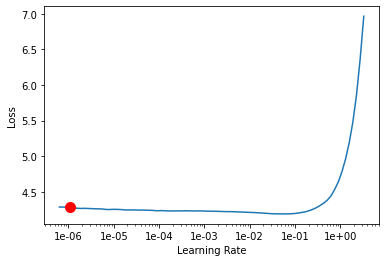

In [24]:
learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.890534,3.586305,0.344280,23:43


In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 3.63E-04


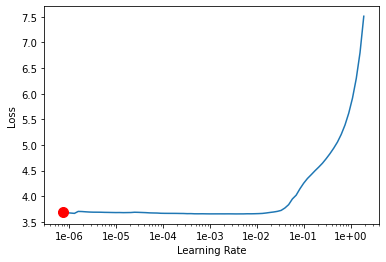

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [28]:
learn.fit_one_cycle(5,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.733439,3.714133,0.334405,26:26
1,3.794631,3.733826,0.332674,26:27
2,3.653919,3.590135,0.346345,26:30
3,3.429082,3.455367,0.359236,26:30
4,3.226474,3.422620,0.363066,26:34


In [29]:
learn.predict('Dark night',200,no_unk=True,temperature=0.75)

"Dark night Blue , a carnival owner who has also died in the Great Depression , is forced to pay off the gambling debts he craves . He eventually finds a new job in a bank , which he owns . He becomes the manager of a gas station , but is unable to attract customers . However , when his wife , Agnes , loses her baby , Blue dies in childbirth . \r \n  Blue is persuaded to start a new life with Blue , a ranch owner and former sheriff . Blue finds that the town is in an unexpected condition : On the ranch of Mr. Black , head of the railroad company , he wins the interest of a struggling rancher named Silver . He never gives up his goals , until Green Hand arrives , having been hired by the man to take over Silver 's company . \r \n  Silver , still unaware of Silver 's presence , decides to sell his herd alone , and Silver offers to send him on a double -"

In [31]:
learn.predict('Lonely street murder',200,no_unk=True,temperature=0.75)

'Lonely street murder - criminal Johnny Allison is sent to prison for a crime he did n\'t commit . He is released from prison and released on parole . He shares a bed with Kelly " Johnny " Cole , a young woman who is following Johnny \'s advice . Johnny seems to be unaware that Kelly is the wrong woman . Later , Johnny falls in love with Casey \'s daughter , Lilly . The pair begin dating until April finds out that Johnny is actually her cousin . xxbos The film centers around John Lewis ( Donald Crisp ) , in his early thirties and in Germany as a Fulbright Officer . There was a young man living in the mansion with his younger brother Owen ( Robert Duvall ) , a college student . Owen is an awkward and different boy , and a good friend of Owen \'s . Owen has no interest in his world . Owen \'s mother and the family \'s Aunt'